In [ ]:
# Necesseries Libraries 

# Libraries to vector
import numpy as np
import pandas as pd

# Libraries to analysis graph
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Library to ignorer warnings
import warnings

# Turn-off warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading data
dataset = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Show first five lines
dataset.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# Dimension
dataset.shape

(1034, 9)

In [ ]:
# show null data
dataset.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

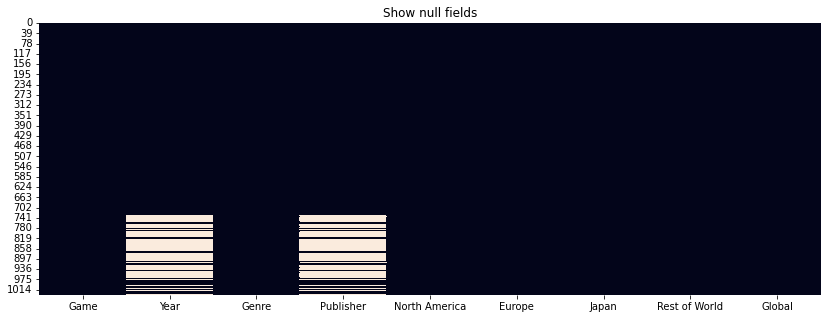

In [ ]:
# null graph
plt.figure(figsize=(14,5))
plt.title('Show null fields')
sns.heatmap(dataset.isnull(), cbar=False);

In [ ]:
# get off null fields on dataset
dataset.dropna(inplace=True)

In [ ]:
# Statistics
dataset.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


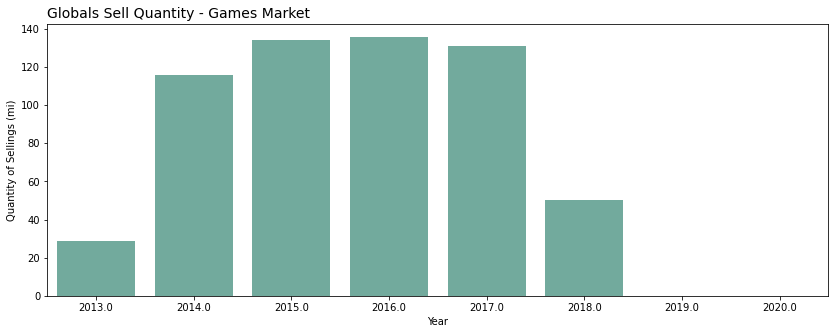

In [ ]:
# Plotting data

#size
plt.figure(figsize=(14,5))

#Title
plt.title("Globals Sell Quantity - Games Market", loc='left', fontsize=14)

# graph
sns.barplot( data=dataset, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)  # hexadecimal

#label
plt.ylabel('Quantity of Sellings (mi)');

In [ ]:
# get off years
# comando loc para localizar
dataset = dataset.loc[ (dataset['Year'] != 2019) & (dataset['Year'] != 2020)]

dataset.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# Confirmando
dataset.loc[(dataset['Year'] != 2019) & (dataset['Year'] != 2020)]['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

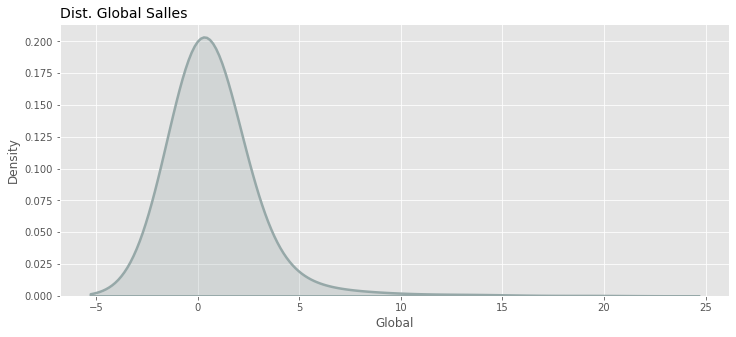

In [ ]:
# Plotting graph

# size
plt.figure(figsize=(12,5))

#style
plt.style.use('ggplot')

#title
plt.title('Dist. Global Salles', loc='left', fontsize=14)

#plot
sns.kdeplot(dataset['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);
#shade = shadows graph
#linewidth = width line

In [ ]:
dataset.groupby( by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


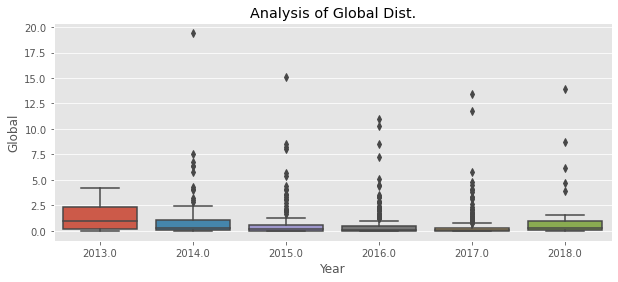

In [ ]:
# Size
plt.figure( figsize=(10,4) )

# title
plt.title('Analysis of Global Dist.')

# Plot
sns.boxplot( data=dataset, x='Year', y='Global');

In [ ]:
dataset.loc[ dataset['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
